# Test problem for Ag Package (Test1C)

#### Based on SFR2 test problem 2, model is run outside of notebook

In [1]:
%matplotlib inline
import sys, os
import matplotlib.pyplot as plt
import arcpy
import geopandas
import matplotlib.image as mpimg
import ConfigParser
import numpy as np
import pandas as pd
import datetime
from Figures import ReportFigures
from matplotlib import cm
from arcpy import env
from datetime import date
from datetime import timedelta
from dateutil.parser import parse
import matplotlib.dates as mdates
from dateutil.relativedelta import relativedelta

flopy is installed in C:\Users\rniswon\AppData\Local\Continuum\miniconda2\lib\site-packages\flopy-3.2.12-py2.7.egg\flopy


In [2]:
rf = ReportFigures()
rf.set_style()
sys.path.append('..')
python_exe = sys.executable

### Get size of gage files and set start and end dates for plotting

In [3]:
# calculate number of lines in file can be any gage file
num_lines = 0
with open(r"..\Agwater1GW_high.all", 'r') as f:
    for line in f:
        num_lines += 1

# set dates for daily values; this date is simulation starte date
dates = []
for i in range(num_lines-1): 
    dates.append(datetime.date(2014, 10, 1)+datetime.timedelta(days=i))
    
# set start and end dates for plot 
startdate, enddate, plotdates = [], [], []
startdate.append(datetime.date(2016, 10, 1))
enddate.append(datetime.date(2018, 9, 30))

### Read and process the Ag well time series output file for high field K

In [4]:

#open irrigation well file again to read lines
fname = open(r"..\Agwater1GW_high.all","r")
#set firstline for headers
firstline=fname.readline()
# store all data from file in lines
lines=fname.readlines()
x, y1_high, y2_high = [], [], []
# set variabes for plotting between startdate and enddate
i=-1
for line in lines:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
        plotdates.append(dates[i])
        y1_high.append(line.split()[4])
        y2_high.append(line.split()[5])
# close irrigation well file
fname.close()

# Cumulate values and convert from cfs to acre-feet per acre
x=np.array(y1_high,dtype=float)
x=x*5.76e-4
y1_high=x
y1_high_cum=x.cumsum()
x=np.array(y2_high,dtype=float)
x=x*5.76e-4
y2_high=x
y2_high_cum=x.cumsum()

#print out average annual NIWR
print(y1_high_cum[len(y1_high_cum)-1]/2)
print(y2_high_cum[len(y2_high_cum)-1]/2)


4.24164986539
4.24164986539


In [5]:
# set headers for plot legend

header=[]
header.append(firstline.split()[0])
header.append(firstline.split()[1])
header.append(firstline.split()[2])
header.append(firstline.split()[3])
header.append(firstline.split()[4])
header.append(firstline.split()[5])
header.append(firstline.split()[6])

### Read and process the Ag well time series output file for low field K

In [6]:
#open irrigation segment file again to read lines
fname = open(r"..\Agwater1GW_low.all","r")
#set firstline for headers
firstline=fname.readline()
# store all data from file in lines
lines=fname.readlines()
y1_low, y2_low = [], []
# set variabes for plotting between startdate and enddate
i=-1
for line in lines:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
 #       plotdates.append(dates[i])
 #       x.append(line.split()[0])
        y1_low.append(line.split()[4])
        y2_low.append(line.split()[5])
# close irrigation well file
fname.close()

# Cumulate values and convert from cfs to acre-feet per acre
x1=np.array(y1_low,dtype=float)
x1=x1*5.76e-4
y1_low=x1
y1_low_cum=x1.cumsum()
x2=np.array(y2_low,dtype=float)
x2=x2*5.76e-4
y2_low=x2
y2_low_cum=x2.cumsum()

#print out average annual NIWR
print(y1_low_cum[len(y1_low_cum)-1]/2)
print(y2_low_cum[len(y2_low_cum)-1]/2)

3.89032409308
3.89032409308


### Read and process the Ag well time series output file for high field K

### Read and process the Ag well ET file for low field K

In [7]:
#open SW ET file to read lines
fname = open(r"..\Agwater1GW_ET_low.all","r")
#set firstline for headers
firstlineet=fname.readline()
# store all data from file in lines
lineset=fname.readlines()
y1et_low, y2et_low = [], []
# set variabes for plotting between startdate and enddate
i=-1
for line in lineset:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
        #plotdates.append(dates[i])
#        xet.append(line.split()[0])
        y1et_low.append(line.split()[4])
        y2et_low.append(line.split()[5])

# Cumulate values
x1=np.array(y1et_low,dtype=float)
x1=x1*5.76e-4
y1et_low=x1
y1et_low_cum=x1.cumsum()
x2=np.array(y2et_low,dtype=float)
x2=x2*5.76e-4
y2et_low=x2
y2et_low_cum=x2.cumsum()

# close GW ET file
fname.close()

#print out average annual NIWR
print(y1et_low_cum[len(y1et_low_cum)-1]/2)
print(y2et_low_cum[len(y2et_low_cum)-1]/2)

2.6568000403
2.62737665067


### Read and process the Ag well ET file for high field K

In [8]:
#open SW ET file to read lines
fname = open(r"..\Agwater1GW_high_ET.all","r")
#set firstline for headers
firstlineet=fname.readline()
# store all data from file in lines
lineset=fname.readlines()
y1et_high, y2et_high, y3et_high = [], [], []
# set variabes for plotting between startdate and enddate
i=-1
for line in lineset:
    i=i+1
    if dates[i]>enddate[0]:
        break
    if dates[i]>=startdate[0]:
        y1et_high.append(line.split()[4])
        y2et_high.append(line.split()[5])

# Cumulate values
x=np.array(y1et_high,dtype=float)
x=x*5.76e-4
y1et_high=x
y1et_high_cum=x.cumsum()
x=np.array(y2et_high,dtype=float)
x=x*5.76e-4
y2et_high=x
y2et_high_cum=x.cumsum()

# close GW ET file
fname.close()


#print out average annual NIWR
print(y1et_high_cum[len(y1et_high_cum)-1]/2)
print(y2et_high_cum[len(y2et_high_cum)-1]/2)

2.6568000403
2.64781138027


### Plot groundwater pumping for low and high field K

C:\Users\rniswon\AppData\Local\Continuum\miniconda2\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family [u'Univers 57 Condensed'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


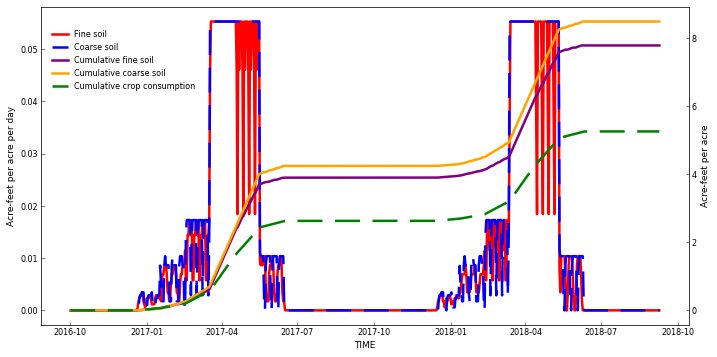

In [9]:
# blow up the fonts for this demo
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['axes.titlesize'] = 14

fig, axes = plt.subplots(1, 1, figsize=(10, 5))
#axes = axes.flat
lns1 = axes.plot(plotdates,y2_low,color='r', linewidth=2.5, label="Fine soil")
lns2 = axes.plot(plotdates,y2_high,'--', dashes=[10, 5, 10, 5], color='b', linewidth=2.5, label="Coarse soil")
ax2 = axes.twinx()
lns3 = ax2.plot(plotdates,y2_low_cum, color='purple', linewidth=2.5, label="Cumulative fine soil")
lns4 = ax2.plot(plotdates,y2_high_cum, color='orange', linewidth=2.5, label="Cumulative coarse soil")
lns5 = ax2.plot(plotdates,y2et_low_cum,'--', dashes=[10, 5, 10, 5],color='g', linewidth=2.5, label="Cumulative crop consumption")
axes.set_ylabel('Acre-feet per acre per day')
axes.set_xlabel(header[0])
ax2.set_ylabel('Acre-feet per acre', color='black')  # we already handled the x-label with ax1
# Set legend
lns = lns1+lns2+lns3+lns4+lns5
labs = [l.get_label() for l in lns]
axes.legend(lns, labs, loc=0, bbox_to_anchor=(.25, 0.95))

axes.set_xlabel(header[0])
plt.xlabel(header[0])

#rf.title(axes[0], 'Groundwater irrigation requirements for fine and coarse soil', subplot_prefix='A')
#rf.title(axes[1], 'Cumulative groundwater irrigation requirements for fine and coarse soil', subplot_prefix='B')

fmt = mdates.DateFormatter('%Y-%m-%d')

plt.tight_layout()
plt.savefig('Fig7.pdf')

### Plot well-watered and actual ET for Low and High inflows

C:\Users\rniswon\AppData\Local\Continuum\miniconda2\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family [u'Univers 67 Condensed'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\rniswon\AppData\Local\Continuum\miniconda2\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family [u'cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


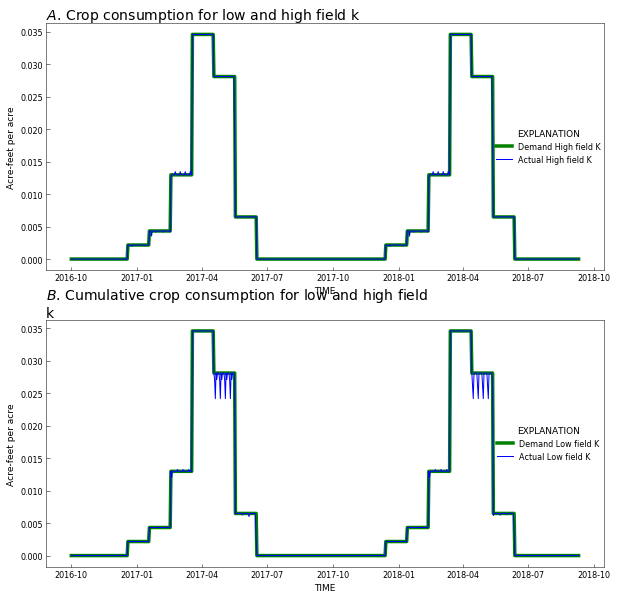

In [10]:
# blow up the fonts for this demo
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['axes.titlesize'] = 14

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
axes = axes.flat
axes[0].plot(plotdates,y1et_high,color='g', linewidth=3.5, label="Demand High field K")
axes[0].plot(plotdates,y2et_high,color='b', linewidth=1.0, label="Actual High field K")

axes[1].plot(plotdates,y1et_low,color='g', linewidth=3.5, label="Demand Low field K")
axes[1].plot(plotdates,y2et_low,color='b', linewidth=1.0, label="Actual Low field K")

#start, end = axes[0].get_xlim()
#axes[0].xaxis.set_ticks(np.arange(start, end, 90.0))

axes[0].set_ylabel('Acre-feet per acre')
axes[0].set_xlabel(header[0])

plt.ylabel('Acre-feet per acre')
plt.xlabel(header[0])

rf.title(axes[0], 'Crop consumption for low and high field K', subplot_prefix='A')

#rf.axes_numbering(axes[1], format_x=True)
fmt = mdates.DateFormatter('%Y-%m-%d')
rf.title(axes[1], 'Cumulative crop consumption for low and high field K', subplot_prefix='B')

# Set legend
handles, labels = axes[0].get_legend_handles_labels()
rf.legend(axes[0], handles, labels, bbox_to_anchor=(.9, 0.4))

# Set legend
handles, labels = axes[1].get_legend_handles_labels()
rf.legend(axes[1], handles, labels, bbox_to_anchor=(.9, 0.4))


#plt.tight_layout()
#plt.savefig('GWonlyET.pdf')